In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group1 = [15,17,19,20]

bookings = pd.read_json("../../chatbot_data/bookings/bookings18-9-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,8,24,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

g1Bookings = validBookings.loc[validBookings['user'].isin(group1)].copy() 
g1Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
6,2023-08-24 19:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-24 18:19:29+00:00,2023-08-24 18:19:29+00:00
8,2023-08-26 16:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-25 20:26:23+00:00,2023-08-25 20:26:23+00:00
9,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:20:51+00:00,2023-08-26 10:20:51+00:00
10,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:22:25+00:00,2023-08-26 10:22:25+00:00
12,2023-08-27 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:12:42+00:00,2023-08-26 22:12:42+00:00
13,2023-08-28 12:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:15:33+00:00,2023-08-26 22:15:33+00:00
14,2023-08-27 06:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-26 23:12:21+00:00,2023-08-26 23:12:21+00:00
15,2023-08-27 15:00:00+00:00,7200,dishwasher,None,yes,2.293112,16,electricity_consumption,17,2023-08-27 14:30:19+00:00,2023-08-27 14:30:19+00:00
17,2023-08-28 14:00:00+00:00,14400,washing_and_drying,None,yes,3.334012,20,electricity_consumption,19,2023-08-28 11:11:18+00:00,2023-08-28 11:11:18+00:00
18,2023-08-29 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-28 19:42:43+00:00,2023-08-28 19:42:43+00:00


55 bookings were made in total.


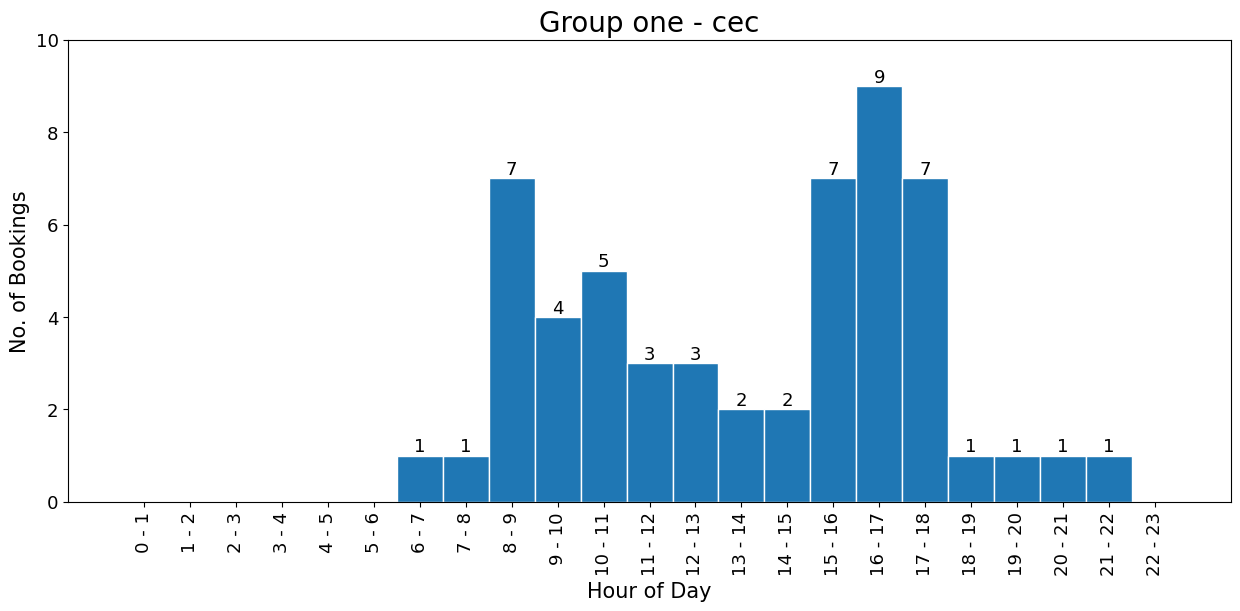

In [11]:
# Extract the hour from 'start'
g1Bookings['hour'] = g1Bookings['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(g1Bookings['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Group one - cec", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g1Bookings)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('cec_group_one_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

7 bookings were made in total.


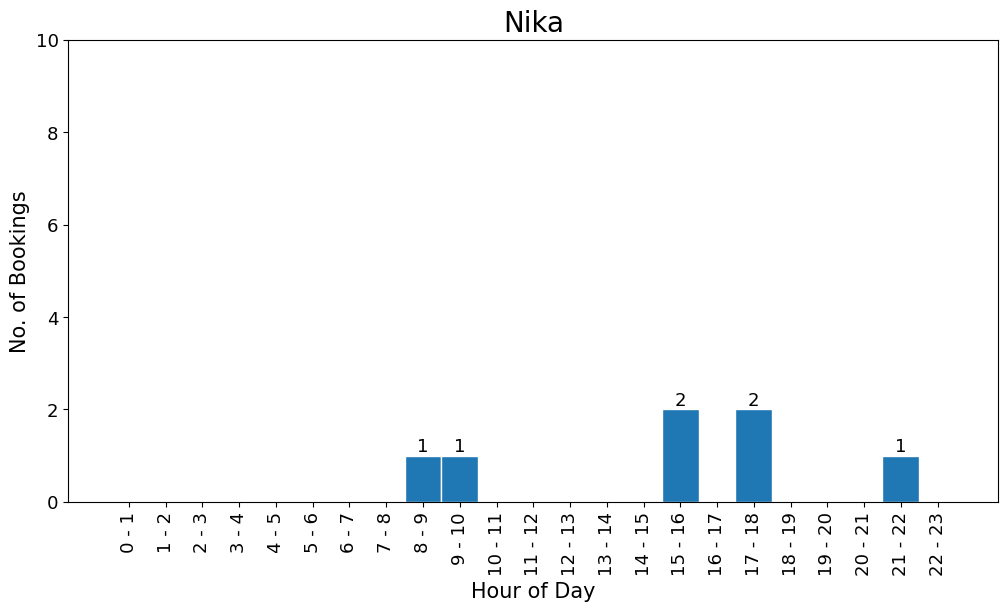

In [14]:
# User 15

bookingsUser15 = bookings.loc[bookings['user'] == 15].copy()

# Extract the hour from 'start'
bookingsUser15['hour'] = bookingsUser15['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser15['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Nika", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser15)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('nika_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

10 bookings were made in total.


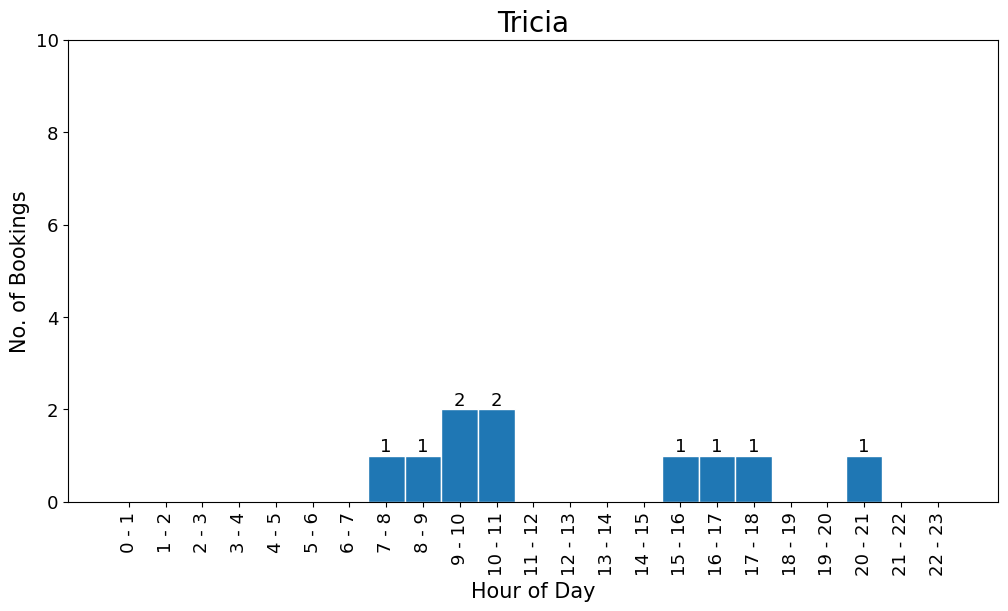

In [13]:
# User 17

bookingsUser17 = bookings.loc[bookings['user'] == 17].copy()

# Extract the hour from 'start'
bookingsUser17['hour'] = bookingsUser17['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser17['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Tricia", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser17)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('tricia_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

32 bookings were made in total.


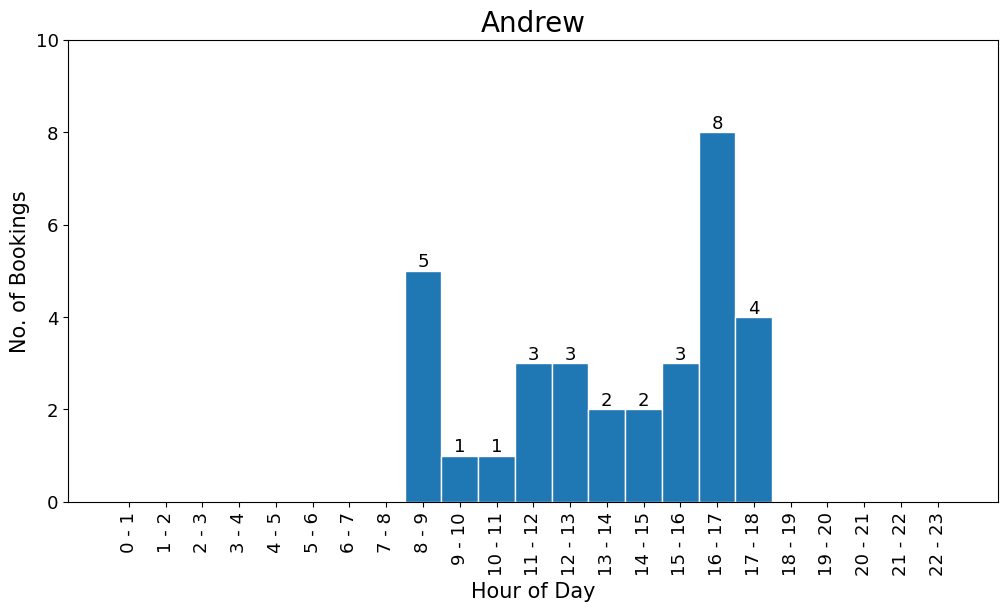

In [8]:
# User 19

bookingsUser19 = bookings.loc[bookings['user'] == 19].copy()

# Extract the hour from 'start'
bookingsUser19['hour'] = bookingsUser19['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser19['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Andrew", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser19)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('andrew_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

6 bookings were made in total.


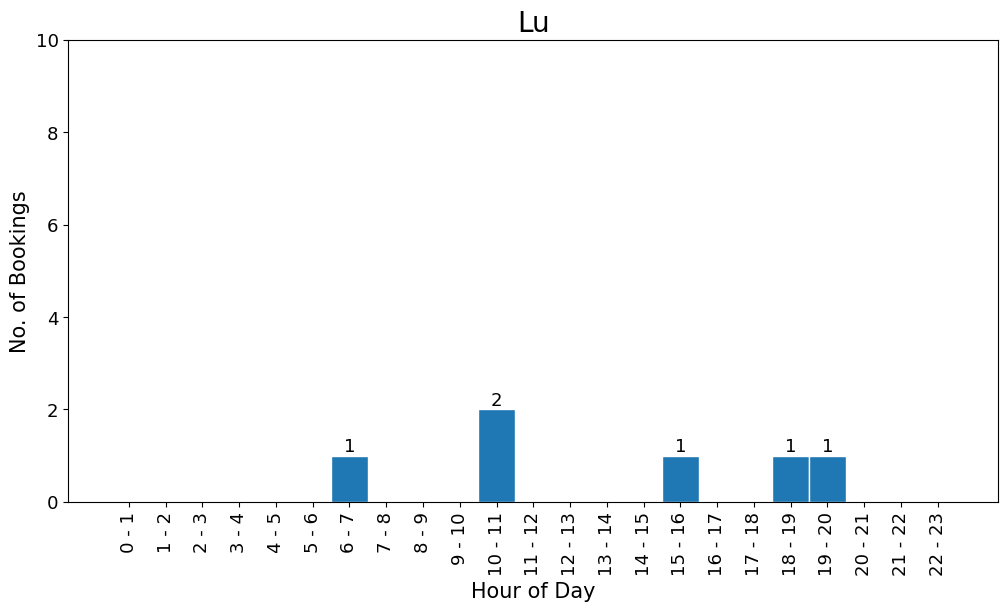

In [7]:
# User 20

bookingsUser20 = bookings.loc[bookings['user'] == 20].copy()

# Extract the hour from 'start'
bookingsUser20['hour'] = bookingsUser20['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser20['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Lu", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser20)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('lu_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()